## Overview
* In this project, we'll create a function to perform portfolio analysis such as calculating portfolio returns, risk and sharp ratio
* A portfolio is a collection of financial investments such as stocks, fixed income securities (bonds), cash, mutual funds and Exchange Traded Funds (ETFs).


* Let's assume that you have $1M to invest in the market, how can you allocate these assets among a selected set of securities? Should you invest them all in Apple? S&P500? Bonds?
* The answer depends on many factors such as client's risk tolerance, target returns and investment time span

### Types of Assets: 1) Equities
* A stock simple represents an ownership of a certain percentage of a company
* A stock gives the owner the right to some shares in a given company depending on how much stock (shares) they own.
* Stocks are traded on stock exchanges such as New York Stock Exchanges (NYSE) and regular individuals can buy them via online brokerage firms
* Stocks are generally liquid as compared to real estate which could take a much longer time to sell

### Types of Assets: 2) Fixed Income Securities (Bonds)
* A bond is a fixed income that are generally issued by governments or corporations and represents a loan made by an investor to the borrower.
* Bonds pay the investor a fixed stated interest rate
* Bonds are used by companies and governments to raise money to fund future projects
* Bonds that are less risky such as U.S. Govt. Bonds pay less interest compared to high risk bonds

### Types of Assets: 2) Exchanged Traded funds (ETFs)
* ETFs are a type of security that includes a group a securities and possibly track an index such as the S&P500
* ETFs are like mutual funds however they are marketable securities and are being traded on exchanges similar to any other stocks
* ETFs can include a collection of stocks, bonds, and commodities.
* ETFs have generally low management feesand offer a tool for risk diversification.

In [94]:
import pandas as pd

df = pd.read_csv("stock.csv")
df.head()

Date       AAPL         BA          T    MGM        AMZN         IBM  \
0  2012-01-12  60.198570  75.510002  30.120001  12.13  175.929993  180.550003   
1  2012-01-13  59.972858  74.599998  30.070000  12.35  178.419998  179.160004   
2  2012-01-17  60.671429  75.239998  30.250000  12.25  181.660004  180.000000   
3  2012-01-18  61.301430  75.059998  30.330000  12.73  189.440002  181.070007   
4  2012-01-19  61.107143  75.559998  30.420000  12.80  194.449997  180.520004   

        TSLA        GOOG        sp500  
0  28.250000  313.644379  1295.500000  
1  22.790001  311.328064  1289.089966  
2  26.600000  313.116364  1293.670044  
3  26.809999  315.273285  1308.040039  
4  26.760000  318.590851  1314.500000

In [95]:
# Sort the data based on Date
df = df.sort_values(by = ['Date'])
df.head()

Date       AAPL         BA          T    MGM        AMZN         IBM  \
0  2012-01-12  60.198570  75.510002  30.120001  12.13  175.929993  180.550003   
1  2012-01-13  59.972858  74.599998  30.070000  12.35  178.419998  179.160004   
2  2012-01-17  60.671429  75.239998  30.250000  12.25  181.660004  180.000000   
3  2012-01-18  61.301430  75.059998  30.330000  12.73  189.440002  181.070007   
4  2012-01-19  61.107143  75.559998  30.420000  12.80  194.449997  180.520004   

        TSLA        GOOG        sp500  
0  28.250000  313.644379  1295.500000  
1  22.790001  311.328064  1289.089966  
2  26.600000  313.116364  1293.670044  
3  26.809999  315.273285  1308.040039  
4  26.760000  318.590851  1314.500000

In [96]:
df.tail()

Date        AAPL          BA          T        MGM         AMZN  \
2154  2020-08-05  440.250000  174.279999  29.850000  16.719999  3205.030029   
2155  2020-08-06  455.609985  172.199997  29.840000  18.459999  3225.000000   
2156  2020-08-07  444.450012  170.020004  30.020000  19.030001  3167.459961   
2157  2020-08-10  450.910004  179.410004  30.200001  21.650000  3148.159912   
2158  2020-08-11  437.500000  180.130005  30.200001  21.500000  3080.669922   

             IBM         TSLA         GOOG        sp500  
2154  125.449997  1485.020020  1473.609985  3327.770020  
2155  126.120003  1489.579956  1500.099976  3349.159912  
2156  124.959999  1452.709961  1494.489990  3351.280029  
2157  127.110001  1418.569946  1496.099976  3360.469971  
2158  126.750000  1374.390015  1480.319946  3333.689941

In [97]:
# Function to normalize the prices based on the initial price
def normalize(df):
  x = df.copy()
  for i in x.columns[1:]:
    x[i] = x[i]/x[i][0]
  return x

# Function to plot interactive plot
def interactive_plot(df, title):
  fig = px.line(title = title)
  for i in df.columns[1:]:
    fig.add_scatter(x = df['Date'], y = df[i], name = i)
  fig.show()

In [98]:
# Plot interactive chart
import plotly.express as px
interactive_plot(df, 'Prices')

In [99]:
# Plot normalized interactive chart
interactive_plot(normalize(df), 'Normalized Prices')

### Asset Allocation 
* Asset allocation is an inestment strategy that is used to allocate client's assets based on their risk tolerance, target returns and investmnet time span
* The goal of portfolio managers is to maximize returns and reuce risks

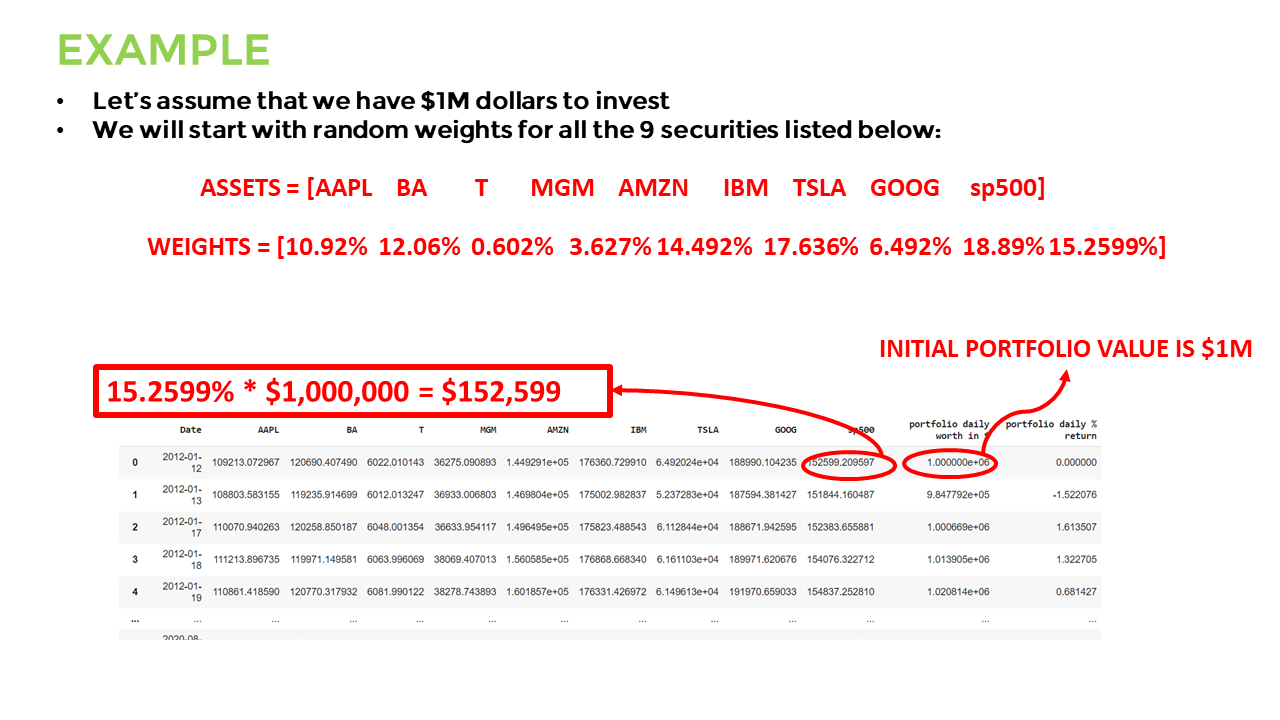

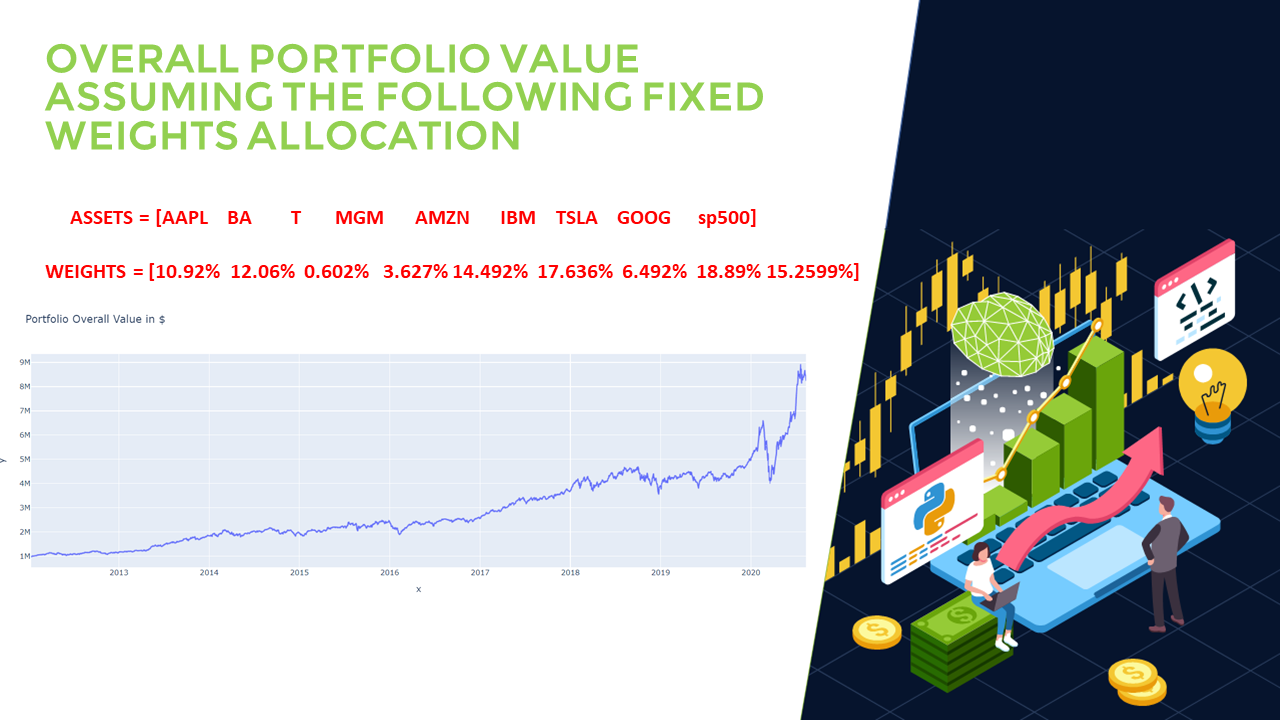

#### What is the common advice that financial advisors generally recommend to retired seniors when it comes to asset allocations?
* The conventional wisdom is to subtract client's age from 100 to calculate the % of portolio that should be allocated to stocks

* For Example: If you're 30 years old, you should have 70% allocated to stocks
* If you are 75 years old, you should invest 25% in stocks (old retired seniors generally recommend a more stable low risk portfolio). 

## RANDOM ASSET ALLOCATION AND CALCULATE PORTFOLIO DAILY RETURN
We are creating random weights for our 9 stocksin which we are going to invest 1000000 ($ 1M) as per the weightage.

In [100]:
# let's create random portfolio weights
# portfolio weights must sum to 1
import numpy as np

# Set random seed
np.random.seed(91297)

# create random weights for the stocks and normalize them
weights = np.array(np.random.random(9)) # 9 denotes No. of values

# ensure that sum of all the weights are = 1
weights = weights / np.sum(weights)
print(weights)


[0.038025   0.22933149 0.12255763 0.0094628  0.20161859 0.10101637
 0.03624932 0.11971391 0.1420249 ]


In [101]:
# Normalize the stock avalues 
df_portfolio = normalize(df)
df_portfolio.head()

Date      AAPL        BA         T       MGM      AMZN       IBM  \
0  2012-01-12  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1  2012-01-13  0.996251  0.987949  0.998340  1.018137  1.014153  0.992301   
2  2012-01-17  1.007855  0.996424  1.004316  1.009893  1.032570  0.996954   
3  2012-01-18  1.018320  0.994040  1.006972  1.049464  1.076792  1.002880   
4  2012-01-19  1.015093  1.000662  1.009960  1.055235  1.105269  0.999834   

       TSLA      GOOG     sp500  
0  1.000000  1.000000  1.000000  
1  0.806726  0.992615  0.995052  
2  0.941593  0.998317  0.998587  
3  0.949027  1.005193  1.009680  
4  0.947257  1.015771  1.014666

After assigning the random weights to the stocks, we are to multiply the stock prices with 1M so that we get the acctual priceof the stock if invested 1M asper the weightage

In [102]:
# Note that enumerate returns the value and a counter as well

for count, stock in enumerate (df_portfolio.columns[1: ]):
    df_portfolio[stock] = df_portfolio[stock] * weights[count] * 1000000
df_portfolio.tail()

Date           AAPL             BA              T           MGM  \
2154  2020-08-05  278088.068615  529305.923055  121459.002745  13043.525393   
2155  2020-08-06  287790.348144  522988.747332  121418.312962  14400.925844   
2156  2020-08-07  280741.045844  516367.888865  122150.729059  14845.593069   
2157  2020-08-10  284821.560775  544886.265305  122883.149225  16889.494117   
2158  2020-08-11  276351.005154  547072.980913  122883.149225  16772.476837   

              AMZN           IBM          TSLA           GOOG          sp500  
2154  3.673016e+06  70188.331061  1.905521e+06  562457.418672  364821.471897  
2155  3.695902e+06  70563.194385  1.911372e+06  572568.297473  367166.433188  
2156  3.629960e+06  69914.180860  1.864062e+06  570427.040101  367398.860369  
2157  3.607842e+06  71117.090830  1.820255e+06  571041.550439  368406.348310  
2158  3.530497e+06  70915.672975  1.763565e+06  565018.521937  365470.469357

In [103]:
# we can check that the row sums are equal to $1M
df_portfolio.loc[:, df_portfolio.columns != 'Date'].sum(axis=1).head()

0    1.000000e+06
1    9.905448e+05
2    1.003841e+06
3    1.016575e+06
4    1.025736e+06
dtype: float64

In [104]:
import warnings
warnings.filterwarnings('ignore')

In [105]:
# Let's create an additional column that contains the sum of all $ values in the portfolio
df_portfolio['portfolio daily worth in $'] = df_portfolio[df_portfolio != 'Date'].sum(axis = 1)
df_portfolio.head()

Date          AAPL             BA              T          MGM  \
0  2012-01-12  38024.995036  229331.486905  122557.630959  9462.797397   
1  2012-01-13  37882.421921  226567.713036  122354.177975  9634.422741   
2  2012-01-17  38323.680887  228511.457543  123086.594072  9556.411221   
3  2012-01-18  38721.626967  227964.779400  123412.112337  9930.866518   
4  2012-01-19  38598.903749  229483.329796  123778.320385  9985.474582   

            AMZN            IBM          TSLA           GOOG          sp500  \
0  201618.592027  101016.370559  36249.316966  119713.906386  142024.903765   
1  204472.177670  100238.676559  29243.255572  118829.799621  141322.175504   
2  208185.276481  100708.648012  34132.100223  119512.370052  141824.286764   
3  217101.278898  101307.308891  34401.562889  120335.638237  143399.660872   
4  222842.813475  100999.586344  34337.406089  121601.909250  144107.862600   

   portfolio daily worth in $  
0                1.000000e+06  
1                9.905448e+05  
2                1.003841e+06  
3                1.016575e+06  
4                1.025736e+06

In [106]:
# Let's calculate the portfolio daily returns
# defining a new column in the dataframe and setting it to zero
df_portfolio['portfolio daily % return'] = 0.0000

for i in range(1, len(df)):
  # Calculate the percentage of change from the previous day
  df_portfolio['portfolio daily % return'][i] = ( (df_portfolio['portfolio daily worth in $'][i]
                                                   - df_portfolio['portfolio daily worth in $'][i-1])
                                                 / df_portfolio['portfolio daily worth in $'][i-1]) * 100 

df_portfolio.head()

Date          AAPL             BA              T          MGM  \
0  2012-01-12  38024.995036  229331.486905  122557.630959  9462.797397   
1  2012-01-13  37882.421921  226567.713036  122354.177975  9634.422741   
2  2012-01-17  38323.680887  228511.457543  123086.594072  9556.411221   
3  2012-01-18  38721.626967  227964.779400  123412.112337  9930.866518   
4  2012-01-19  38598.903749  229483.329796  123778.320385  9985.474582   

            AMZN            IBM          TSLA           GOOG          sp500  \
0  201618.592027  101016.370559  36249.316966  119713.906386  142024.903765   
1  204472.177670  100238.676559  29243.255572  118829.799621  141322.175504   
2  208185.276481  100708.648012  34132.100223  119512.370052  141824.286764   
3  217101.278898  101307.308891  34401.562889  120335.638237  143399.660872   
4  222842.813475  100999.586344  34337.406089  121601.909250  144107.862600   

   portfolio daily worth in $  portfolio daily % return  
0                1.000000e+06                  0.000000  
1                9.905448e+05                 -0.945518  
2                1.003841e+06                  1.342292  
3                1.016575e+06                  1.268529  
4                1.025736e+06                  0.901141

In [107]:
df_portfolio.tail()

Date           AAPL             BA              T           MGM  \
2154  2020-08-05  278088.068615  529305.923055  121459.002745  13043.525393   
2155  2020-08-06  287790.348144  522988.747332  121418.312962  14400.925844   
2156  2020-08-07  280741.045844  516367.888865  122150.729059  14845.593069   
2157  2020-08-10  284821.560775  544886.265305  122883.149225  16889.494117   
2158  2020-08-11  276351.005154  547072.980913  122883.149225  16772.476837   

              AMZN           IBM          TSLA           GOOG          sp500  \
2154  3.673016e+06  70188.331061  1.905521e+06  562457.418672  364821.471897   
2155  3.695902e+06  70563.194385  1.911372e+06  572568.297473  367166.433188   
2156  3.629960e+06  69914.180860  1.864062e+06  570427.040101  367398.860369   
2157  3.607842e+06  71117.090830  1.820255e+06  571041.550439  368406.348310   
2158  3.530497e+06  70915.672975  1.763565e+06  565018.521937  365470.469357   

      portfolio daily worth in $  portfolio daily % return  
2154                7.517900e+06                  1.444652  
2155                7.564170e+06                  0.615459  
2156                7.435867e+06                 -1.696193  
2157                7.408142e+06                 -0.372858  
2158                7.258546e+06                 -2.019343

In [108]:
#So, if we invested $1M as per the random weights on 2012-01-12, then we would 
#have around $21775630 i.e. $21M on 2020-08-11. (checking the last value of the 
#column "portfolio daily worth in $"

# we can change this random weights to see the change in the earnings in that period by
# changing the seed

## PORTFOLIO ALLOCATION - DAILY RETURN/WORTH CALCULATION (FUNCTION)

#### Lets assume we have $1,000,000 to be invested and we will allocate this fund based on the weights of the stocks

We will create a function that takes in the stock prices along with the weights and retun:
* Daily value of each individual securuty in $ over the specified time period
* Overall daily worth of the entire portfolio 
* Daily return 

In [109]:
def portfolio_allocation(df, weights):
    df_portfolio = df.copy()
    
    #normalize the stock values
    df_portfolio = normalize(df_portfolio)
    
    for count, stock in enumerate(df_portfolio.columns[1:]):
        df_portfolio[stock] = df_portfolio[stock] * weights[count] * 1000000
    
    df_portfolio['portfolio daily worth in $'] = df_portfolio[df_portfolio != 'Date'].sum(axis = 1)
    df_portfolio['portfolio daily % return'] = 0.0000
    
    for i in range(1, len(df)):
        # calculate the % change from previous day
        df_portfolio['portfolio daily % return'][i] = ( (df_portfolio['portfolio daily worth in $'][i] - df_portfolio['portfolio daily worth in $'][i-1]) / df_portfolio['portfolio daily worth in $'][i-1]) * 100 
  
      # set the value of first row to zero, as previous value is not available
    df_portfolio['portfolio daily % return'][0] = 0
    return df_portfolio

In [110]:
# Set random seed
np.random.seed(0)
weights = np.array(np.random.random(9)) # 9 denotes No. of values
weights = weights / np.sum(weights)

portfolio_allocation(df, weights).tail()

Date           AAPL             BA              T            MGM  \
2154  2020-08-05  695095.622143  285871.387877  103452.927480  130072.481292   
2155  2020-08-06  719346.975532  282459.561724  103418.269883  143608.733146   
2156  2020-08-07  701726.877007  278883.720388  104042.106631  148043.038105   
2157  2020-08-10  711926.336765  294286.132298  104665.946846  168425.202656   
2158  2020-08-11  690753.741482  295467.149548  104665.946846  167258.284393   

              AMZN           IBM          TSLA           GOOG          sp500  \
2154  1.336629e+06  77721.478930  3.983686e+06  725614.480410  428694.131699   
2155  1.344957e+06  78136.575450  3.995918e+06  738658.312394  431449.646991   
2156  1.320961e+06  77417.904835  3.897011e+06  735895.921315  431722.767342   
2157  1.312912e+06  78749.920293  3.805428e+06  736688.688171  432906.645489   
2158  1.284766e+06  78526.884734  3.686912e+06  728918.505840  429456.755131   

      portfolio daily worth in $  portfolio daily % return  
2154                7.766837e+06                  0.597239  
2155                7.837953e+06                  0.915640  
2156                7.695704e+06                 -1.814875  
2157                7.645989e+06                 -0.646019  
2158                7.466725e+06                 -2.344549

In [111]:
# Set random seed
np.random.seed(1)
weights = np.array(np.random.random(9)) # 9 denotes No. of values
weights = weights / np.sum(weights)

portfolio_allocation(df, weights).tail()

Date          AAPL             BA          T            MGM  \
2154  2020-08-05  1.169639e+06  637603.764437  43.470976  159823.268799   
2155  2020-08-06  1.210447e+06  629994.072489  43.456413  176455.595613   
2156  2020-08-07  1.180797e+06  622018.563244  43.718549  181904.135584   
2157  2020-08-10  1.197960e+06  656371.899154  43.980687  206948.204332   
2158  2020-08-11  1.162333e+06  659006.024416  43.980687  205514.383055   

              AMZN           IBM          TSLA           GOOG          sp500  \
2154  1.025339e+06  24605.717829  3.755031e+06  622657.249588  390869.311081   
2155  1.031727e+06  24737.132568  3.766562e+06  633850.295988  393381.699948   
2156  1.013320e+06  24509.609796  3.673332e+06  631479.859788  393630.722166   
2157  1.007145e+06  24931.310424  3.587005e+06  632160.141182  394710.143603   
2158  9.855541e+05  24860.699956  3.475292e+06  625492.467796  391564.646224   

      portfolio daily worth in $  portfolio daily % return  
2154                7.785612e+06                  0.778750  
2155                7.867198e+06                  1.047911  
2156                7.721035e+06                 -1.857875  
2157                7.707276e+06                 -0.178206  
2158                7.529661e+06                 -2.304516

In [112]:
# Set random seed
np.random.seed(1010)
weights = np.array(np.random.random(9)) # 9 denotes No. of values
weights = weights / np.sum(weights)

portfolio_allocation(df, weights).tail()

Date           AAPL             BA             T            MGM  \
2154  2020-08-05  861401.001268  121077.179462  21526.434753   79016.985222   
2155  2020-08-06  891454.621844  119632.144020  21519.223217   87240.045181   
2156  2020-08-07  869618.819649  118117.642039  21649.030863   89933.815654   
2157  2020-08-10  882258.555202  124641.137114  21778.839231  102315.659831   
2158  2020-08-11  856020.302226  125141.341904  21778.839231  101606.775352   

              AMZN           IBM          TSLA           GOOG          sp500  \
2154  2.175971e+06  86794.237691  1.197606e+07  731876.257295  315317.172571   
2155  2.189529e+06  87257.790193  1.201283e+07  745032.652587  317343.935306   
2156  2.150463e+06  86455.226102  1.171549e+07  742246.423124  317544.823377   
2157  2.137360e+06  87942.733388  1.144016e+07  743046.031256  318415.600657   
2158  2.091540e+06  87693.661940  1.108387e+07  735208.795208  315878.104589   

      portfolio daily worth in $  portfolio daily % return  
2154                1.636904e+07                  0.272023  
2155                1.647184e+07                  0.628034  
2156                1.611152e+07                 -2.187496  
2157                1.585792e+07                 -1.573999  
2158                1.541874e+07                 -2.769490

In [113]:
# Set random seed
np.random.seed(197075)
weights = np.array(np.random.random(9)) # 9 denotes No. of values
weights = weights / np.sum(weights)

portfolio_allocation(df, weights).tail()

Date           AAPL             BA             T           MGM  \
2154  2020-08-05  822997.271483  511714.459919  52321.443145  34922.068430   
2155  2020-08-06  851711.015367  505607.235302  52303.915023  38556.303042   
2156  2020-08-07  830848.715926  499206.420826  52619.421213  39746.832350   
2157  2020-08-10  842924.935778  526776.990060  52934.929156  45219.068585   
2158  2020-08-11  817856.459452  528891.030254  52934.929156  44905.772497   

              AMZN           IBM          TSLA           GOOG          sp500  \
2154  3.973462e+06  31299.018931  6.715042e+06  108105.458429  446231.154840   
2155  3.998220e+06  31466.181394  6.735661e+06  110048.789874  449099.392775   
2156  3.926884e+06  31176.767380  6.568941e+06  109637.235857  449383.685935   
2157  3.902957e+06  31713.179934  6.414565e+06  109755.345992  450615.994180   
2158  3.819286e+06  31623.361852  6.214789e+06  108597.707679  447024.975678   

      portfolio daily worth in $  portfolio daily % return  
2154                1.269609e+07                  0.843854  
2155                1.277267e+07                  0.603172  
2156                1.250844e+07                 -2.068715  
2157                1.237746e+07                 -1.047150  
2158                1.206591e+07                 -2.517096

In [114]:
print(weights)

[0.11253438 0.22170966 0.0527947  0.02533521 0.21811064 0.04504614
 0.12774234 0.02300926 0.17371767]


## PORTFOLIO DATA VISUALIZATION

In [115]:
# Plot the portfolio daily return
import matplotlib.pyplot as plt
plt.figure(figsize = (10,7))
fig = px.line(x = df_portfolio.Date, y = df_portfolio['portfolio daily % return'], title = 'Portfolio Daily % Return')
fig.show()

<Figure size 720x504 with 0 Axes>

In [116]:
# Plot all stocks (normalized)
interactive_plot(df_portfolio.drop(['portfolio daily worth in $', 
                                    'portfolio daily % return'], axis = 1), 
                 'Portfolio individual stocks worth in $ over time')

In [117]:
# Print out a histogram of daily returns
fig = px.histogram(df_portfolio, x = 'portfolio daily % return')
fig.show()

In [118]:
# Plot for the portfolio overall daily worth vs. time.
fig = px.line(x = df_portfolio.Date, y = df_portfolio['portfolio daily worth in $'], title= 'Portfolio Overall Value in $')
fig.show()

## Portfolio Statistical Metrics 
(CUMMULATIVE RETURN, AVERAGE DAILY RETURN, AND SHARPE RATIO)

#### Daily and cummulative Returns
* Stock Daily Return is a calculation of ow much investors have gained/lost per day
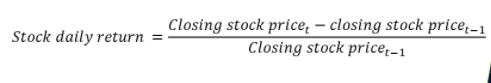

* Cummulative Return is a measure of the aggregate amount that the stock gained/lost over a period of time
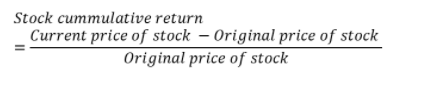

#### Standard Deviation (Risk or Volatility)
* It's a measureof the dispersion away from the mean
* themore spread the data, the higherthe S.D.
* Volatile stocks have higher S.D. and therefore S.D. denotes the risk associated with the security
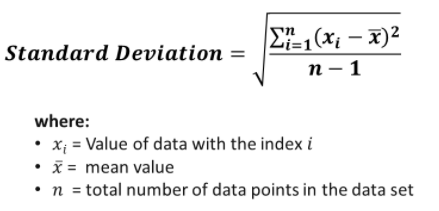

#### Sharpe Ratio
* Used by investors to calculate the return of an investment compared to its risk
* calculated as 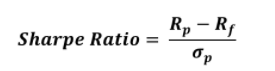
* it is simply a calculation of the average return earned in excess of the risk free rate (US govt. bonds) per unit of risk (volatility)
* Rf is the Risk Free rate which is the return on a investment with zerorisk
* As Sharpe Ratio increases, risk-adjusted return increases and security becomes more desired by the investors

In [119]:
df_portfolio.head(2)

Date          AAPL             BA              T          MGM  \
0  2012-01-12  38024.995036  229331.486905  122557.630959  9462.797397   
1  2012-01-13  37882.421921  226567.713036  122354.177975  9634.422741   

            AMZN            IBM          TSLA           GOOG          sp500  \
0  201618.592027  101016.370559  36249.316966  119713.906386  142024.903765   
1  204472.177670  100238.676559  29243.255572  118829.799621  141322.175504   

   portfolio daily worth in $  portfolio daily % return  
0                1.000000e+06                  0.000000  
1                9.905448e+05                 -0.945518

In [120]:
# Cummulative return of the portfolio (Note that we now look for the last net worth of the portfolio 
#compared to it's start value)

cummulative_return = ((df_portfolio['portfolio daily worth in $'][-1:] - df_portfolio['portfolio daily worth in $'][0])
                      / df_portfolio['portfolio daily worth in $'][0]) * 100

print('Cummulative return of the portfolio is {} %'.format(cummulative_return.values[0]))

Cummulative return of the portfolio is 625.8545964833658 %


In [121]:
# Calculate the portfolio standard deviation
print('Standard deviation of the portfolio is {}'.format(df_portfolio['portfolio daily % return'].std()))

Standard deviation of the portfolio is 1.3477398619496375


In [122]:
# Calculate the average daily return 
print('Average daily return of the portfolio is {} %'.format(df_portfolio['portfolio daily % return'].mean() ))

Average daily return of the portfolio is 0.10097440237769807 %


In [123]:
# Portfolio sharpe ratio
sharpe_ratio = df_portfolio['portfolio daily % return'].mean() / df_portfolio['portfolio daily % return'].std() * np.sqrt(252)
# 252 = No. of days

print('Sharpe ratio of the portfolio is {}'.format(sharpe_ratio))

Sharpe ratio of the portfolio is 1.189338528972327
